In [ ]:
pip install -q seaborn 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import plotly.express as px
from sklearn import metrics
from pandas.tseries.holiday import (
    AbstractHolidayCalendar, Holiday, DateOffset, EasterMonday, GoodFriday, MO, next_monday, next_monday_or_tuesday
)
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Easter
from pandas.tseries.offsets import  CustomBusinessDay
from sklearn.linear_model import RidgeCV

In [ ]:
class MyCustomCalendar(AbstractHolidayCalendar):
    rules = [Holiday("christmasweek", month=12, day=24),Holiday("christmasweek", month=12, day=25), Holiday("christmasweek", month=12, day=26), Holiday("christmasweek", month=12, day=27),
             Holiday("christmasweek", month=12, day=28), Holiday("christmasweek", month=12, day=29), Holiday("christmasweek", month=12, day=30), Holiday("christmasweek", month=12, day=31), Holiday("christmasweek", month=1, day=1) , Holiday("easterweek",month=1 , day=1, offset= [Easter()])]

cal = MyCustomCalendar()
holidays = cal.holidays(start='2015-01-01', end='2018-12-31')

In [ ]:
original_train = pd.read_csv('train.csv')
original_train['Week_Number'] = pd.to_datetime(original_train['date']).dt.isocalendar().week
original_train['Month_Number'] = pd.to_datetime(original_train['date']).dt.month
original_train['Year_Number'] = pd.to_datetime(original_train['date']).dt.year
original_train['Day_Number'] = pd.to_datetime(original_train['date']).dt.weekday
#original_train['Christmas_Week'] =
original_train['Special_Day'] = pd.to_datetime(original_train['date']).isin(holidays)
original_train['Weekend'] = original_train['Day_Number'] >= 5

In [ ]:
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1) #.drop([each], axis=1)
    return df
ohe_train = one_hot(original_train,['Week_Number', 'product', 'store', 'country', 'Weekend','Special_Day'])
ohe_train = ohe_train.drop(['Week_Number', 'Month_Number', 'product', 'store', 'country', 'date', 'row_id', 'Day_Number', 'Weekend','Special_Day' ], axis=1)
ohe_train = ohe_train.drop(['Weekend_False'], axis=1)
ohe_train = ohe_train.drop(['Special_Day_False'], axis=1)
x_train = ohe_train[ohe_train['Year_Number'] < 2018]
x_test = ohe_train[ohe_train['Year_Number'] == 2018]
x_train = x_train.drop(['Year_Number'],axis=1)
x_test = x_test.drop(['Year_Number'],axis=1)
# divide training data into train and validation as implemented in linear regression.

In [ ]:
train_split, validation_split = train_test_split(x_train, test_size=0.2, random_state=123)
type(train_split)

pandas.core.frame.DataFrame

In [ ]:
x_train = train_split.drop('num_sold', axis=1)
y_train = train_split['num_sold']
x_validation = validation_split.drop('num_sold', axis=1)
y_validation = validation_split['num_sold']


In [ ]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 0.2, 0.5, 1, 1.5, 2, 3, 4, 5, 10]).fit(x_train, y_train)
clf.score(x_train, y_train)

0.8292690920028969

In [ ]:
clf.coef_
coef_df = pd.DataFrame(zip(x_train.columns,clf.coef_))
coef_df.columns=['feature_name', 'coeff']
#clf.coef_

In [ ]:
# train_split = tf.convert_to_tensor(train_split, dtype=tf.float32)

In [ ]:
# validation_split = tf.convert_to_tensor(validation_split, dtype=tf.float32)

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu")
       # layers.Dense(3, activation="relu"),
        #layers.Dense(4),
    ]
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',)



In [ ]:
%%time
history = model.fit(x_train, y_train , 
                    batch_size=64,
                    epochs=200,
                    verbose=2,
                    validation_data=(x_validation,y_validation) )

 

Epoch 1/200
247/247 - 1s - loss: 313.2982 - val_loss: 258.6947 - 756ms/epoch - 3ms/step
Epoch 2/200
247/247 - 0s - loss: 220.1924 - val_loss: 194.4658 - 381ms/epoch - 2ms/step
Epoch 3/200
247/247 - 0s - loss: 176.6869 - val_loss: 162.5227 - 443ms/epoch - 2ms/step
Epoch 4/200
247/247 - 0s - loss: 148.8190 - val_loss: 137.7368 - 361ms/epoch - 1ms/step
Epoch 5/200
247/247 - 0s - loss: 126.1806 - val_loss: 116.3247 - 368ms/epoch - 1ms/step
Epoch 6/200
247/247 - 0s - loss: 107.4155 - val_loss: 100.8105 - 365ms/epoch - 1ms/step
Epoch 7/200
247/247 - 0s - loss: 94.7789 - val_loss: 90.1525 - 363ms/epoch - 1ms/step
Epoch 8/200
247/247 - 0s - loss: 85.5539 - val_loss: 82.3993 - 362ms/epoch - 1ms/step
Epoch 9/200
247/247 - 0s - loss: 78.8807 - val_loss: 76.8636 - 448ms/epoch - 2ms/step
Epoch 10/200
247/247 - 0s - loss: 74.4962 - val_loss: 73.4636 - 371ms/epoch - 2ms/step
Epoch 11/200
247/247 - 0s - loss: 71.7654 - val_loss: 71.4944 - 449ms/epoch - 2ms/step
Epoch 12/200
247/247 - 0s - loss: 69.989

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,313.298187,258.694702,0
1,220.192429,194.465790,1
2,176.686920,162.522736,2
3,148.818985,137.736832,3
4,126.180603,116.324654,4
...,...,...,...
195,67.558380,68.754539,195
196,67.564102,68.744339,196
197,67.566299,68.738403,197
198,67.560593,68.764946,198


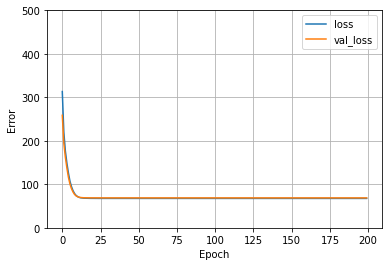

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 500])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)




  


In [ ]:
y_test = x_test['num_sold']

In [ ]:
x_test = x_test.iloc[: , 1:]
#x_test

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_avg =np.average(y_pred, axis=1)

In [ ]:
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
px.scatter(x = y_test, y = y_pred_avg, color=y_pred_avg).show()

# Infer - As color turns yellow, we see divergence
# Infer - As color turns Violet, we see convergence

In [ ]:
metrics.r2_score(y_test, y_pred_avg)
# R square error (R-Squared (R² or the coefficient of determination) 
# is a statistical measure in a regression model that determines the proportion 
# of variance in the dependent variable that can be explained by the independent
# variable. In other words, r-squared shows how well the data fit the regression 
# model (the goodness of fit).May 7, 2022)

0.717323607993768

In [ ]:
# y train should not be a copy of x train and so on.
#y_train = np.array(train_split[:]) 
#y_test = np.array(validation_split[:])
#y_train.shape
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(np.array(train_split))

y_train = np.array(train_split[:])
y_train_normalizer = layers.Normalization(input_shape=[64,], axis=None)
y_train_normalizer.adapt(y_train)

y_train_model = tf.keras.Sequential([y_train_normalizer,layers.Dense(units=1)])

y_train_model.summary()

#y_train_normalizer = layers.Normalization(input_shape=[64], axis=None)


#y_train_model = tf.keras.Sequential([
 # y_train_normalizer,
  #  layers.Dense(units=1)
#])

#y_train_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 64)               3         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 68
Trainable params: 65
Non-trainable params: 3
_________________________________________________________________
